In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


#### Question 1

In [2]:
# read csv
data = read_csv("trees.csv")

Rows: 31 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Girth, Height, Volume

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


##### Part a

In [3]:
## take a SRS of size n = 10 heights
set.seed(8) 
## N = 31
N = dim(data)[1]
## n = 10
n = 10
## take 10 samples of height
indexes = sample.int(N, n)
sample_height = c()
for(i in 1:n) {
  sample_height = c(sample_height, data[['Height']][indexes[i]])
}
## estimate the population mean (tree height)
## sample mean
y_bar = mean(sample_height)
print(paste("Sample Mean: ", y_bar))
# calculate the standard error of the estimator.
se = sqrt((var(sample_height)/n)*(1-(n/N)))
print(paste("SE: ", se))

[1] "Sample Mean:  73.1"
[1] "SE:  1.81756661146071"


##### Part b


In [4]:
## compute 95% CI of sample mean
ci = c(y_bar+2*se, y_bar-2*se)
print(paste("95% CI of sample mean: ", '[', ci[2], ',' ,ci[1], ']'))

[1] "95% CI of sample mean:  [ 69.4648667770786 , 76.7351332229214 ]"


##### Part c

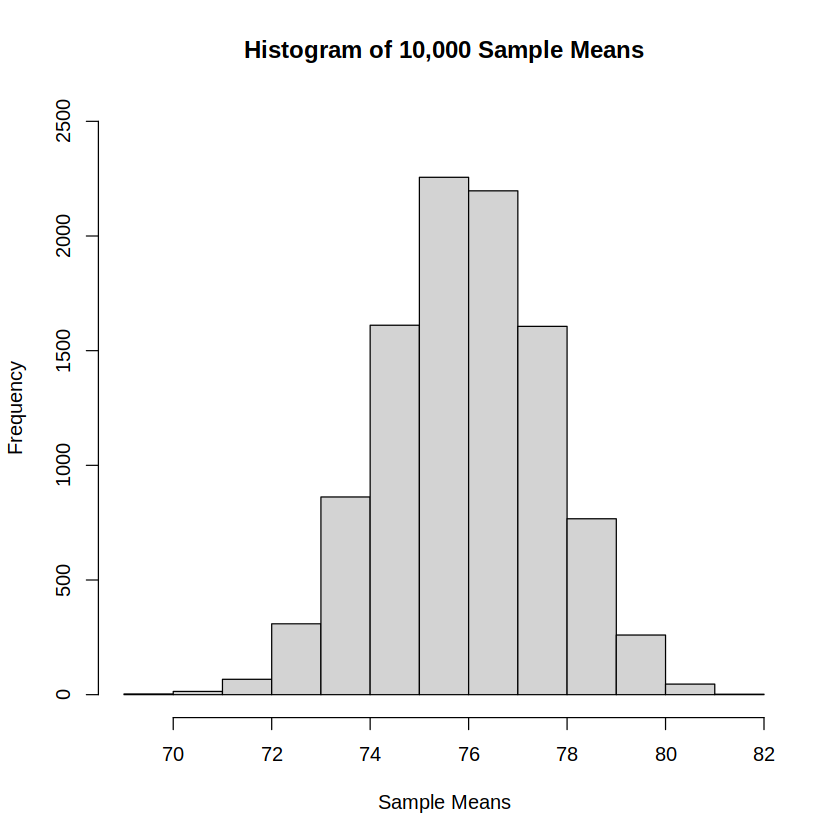

In [5]:
## repeat part a 10,000 times
## construct a histogram of 10,000 sample means (mu_hats)
hist_sample_dat =  replicate(10000, sample(data[['Height']], 10))
y_bar.samp10k = c()
se.samp10k = c()
for(i in 1:10000) {
  y_bar.samp10k = c(y_bar.samp10k, mean(hist_sample_dat[, i]))
  se.samp10k = c(se.samp10k, sqrt((var(hist_sample_dat[, i])/n)*(1-(n/N))))
}
hist(y_bar.samp10k, main="Histogram of 10,000 Sample Means", 
     xlab="Sample Means", ylab="Frequency", ylim=c(0,2500))


##### Part d

In [6]:
## compute mean of sample means
mu_hat.samp10k = mean(y_bar.samp10k)
print(paste("Mean of sample means: ", mu_hat.samp10k))
## compare to pop. mean
diff = mean(data[['Height']]) - mu_hat.samp10k
print(paste("Difference from population mean: ",diff))

[1] "Mean of sample means:  75.98382"
[1] "Difference from population mean:  0.0161800000000056"


The mean of sample means is a very close to the population mean but not exactly equal.

##### Part e


In [7]:
## compute compute 95% CI of sample means from part c
max_intv.samp10k = c()
min_intv.samp10k = c()
for(i in 1:10000) {
  min_intv.samp10k = c(min_intv.samp10k, y_bar.samp10k[i]-2*se.samp10k[i])
  max_intv.samp10k = c(max_intv.samp10k, y_bar.samp10k[i]+2*se.samp10k[i])
}
ci.samp10k = cbind(max_intv.samp10k, min_intv.samp10k)
print("95% CI of sample means: ")
print(paste('[', ci.samp10k[,2], ',', ci.samp10k[,1], ']'))

[1] "95% CI of sample means: "
    [1] "[ 71.0082518338798 , 79.3917481661202 ]"
    [2] "[ 71.7917037824004 , 78.0082962175996 ]"
    [3] "[ 76.8113208371889 , 80.9886791628111 ]"
    [4] "[ 73.1966327141418 , 79.2033672858582 ]"
    [5] "[ 71.9253027074425 , 78.0746972925575 ]"
    [6] "[ 69.8043157441676 , 78.3956842558324 ]"
    [7] "[ 71.3076031184293 , 77.6923968815707 ]"
    [8] "[ 72.5785584762864 , 79.8214415237136 ]"
    [9] "[ 74.3038351854044 , 80.4961648145956 ]"
   [10] "[ 71.7927338868836 , 78.6072661131164 ]"
   [11] "[ 72.442331396705 , 80.957668603295 ]"  
   [12] "[ 72.1690614729621 , 79.2309385270379 ]"
   [13] "[ 74.4913602834105 , 81.1086397165895 ]"
   [14] "[ 74.0046631223262 , 79.9953368776738 ]"
   [15] "[ 70.8748192481104 , 78.1251807518896 ]"
   [16] "[ 73.5537027176919 , 80.8462972823081 ]"
   [17] "[ 70.8831338938098 , 78.1168661061902 ]"
   [18] "[ 73.8575059559 , 80.1424940441 ]"      
   [19] "[ 74.4801776918638 , 80.1198223081362 ]"
   [20] "[ 73.15075

In [8]:
## compute the proportion of intervals containing the true pop. mean
prop1.samp10k = sum(min_intv.samp10k <= mean(data[['Height']]) & max_intv.samp10k >= mean(data[['Height']]))
print(paste("Proportion of intervals containing the true pop. mean: ", prop1.samp10k/10000))

[1] "Proportion of intervals containing the true pop. mean:  0.925"


This is slightly out of my expectations, because I was expecting that approximately 95% of the intervals would contain the true population mean. Instead, the calculations show that only approximately 92.5% of the intervals contain the true population mean.


#### Question 2

In [9]:
## compute the sample size required to estimate the total number of trees in the study area within 
## given parameters,
s_sqr = 9^2
N = 10000
## n >= (4*s^2)/(e^2+((4*s^2)/N)), for 95% CI

##### Part i

In [10]:
## 200 trees with 95% confidence
e = 200
n_a = (4*s_sqr)/(e^2+((4*s_sqr)/N))
n_a * N

[1] 80.99993

We will need at least 81 plots of land to estimate the total number of trees within 200 trees with a 95% confidence level.

##### Part ii

In [11]:
## 500 trees with 95% confidence
e = 500
n_b = (4*s_sqr)/(e^2+((4*s_sqr)/N))
n_b * N

[1] 12.96

We will need at least 13 plots of land to estimate the total number of trees within 500 trees with a 95% confidence level.

##### Part iii

In [67]:
e = 1000
n_c = (4*s_sqr)/(e^2+((4*s_sqr)/N))
n_c * N

[1] 32.4

We will need at least 4 plots of land to estimate the total number of trees within 1000 trees with a 95% confidence level.

#### Question 3

Sampling method: Cluster sampling using shelves in the library

(i) As we do not have an established frame of books, creating a frame of books (that we could have used to draw a simple random sample of books) will be expensive. And even if we had a frame of books, identifying specific books from the randomly selected ones would be generally time-consuming and difficult. For example, sometimes books are not readily available, which may occur due to misplacement or borrowing.

(ii) We need to keep in mind that, besides books, the library also has magazines, past exam papers, research journals, newspapers, catalogues, etc., which cannot be included in the sample.

(iii) Sampling unit: Shelves on each floor of the library 

(iv) Observational unit: Number of pages in a book

(v) The sampling process needs to be carried out using a simple random sampling (SRS) of the clusters, i.e., the shelves, and then count the total number of pages of the books and the total number of books from each of the randomly selected shelves.

(vi) We can estimate the mean by calculating the sum of the total number of pages divided by the sum of the total number of books for each cluster (shelves) in the sample, given by:

$\hat{\mu} = \frac{\sum_{i=1}^{n}y_i}{\sum_{i=1}^{n}m_i} $ ,

where $y_i$ is the total number of pages, $m_i$ is the total number of books for cluster $i$ in the sample (selected randomly using SRS), and $n$ is the number of clusters in the sample.

And we can estimate variance by calculating the sum of the squared differences of the total number of pages from the estimated mean for each cluster divided by one less than the number of clusters in the sample, given by:

$s^2 = \frac{\sum_{i=1}^{n}(y_i-\hat{\mu}m_i)^2}{n-1}$ ,

where $\hat{\mu}$ is the estimated mean of the samples (clusters).

(vii) One obvious problem with this method is that if we randomly pick shelves, which is not a proper representation of the library's entire collection of books on various subjects, we can potentially underrepresent or overrepresent books on certain subjects in the sample. For example, we could potentially end up with a sample of clusters where we totally missed books on biology and/or our sample mostly contains books on mathematics, and that would be a bad representation of the population of books in the library.

#### Question 4


In [52]:
## given parameters
N = 100000
Nh.houses = 35000
Nh.condos = 35000
Nh.apts = 30000
# standard deviations
s_sqr.houses = 500^2
s_sqr.condos = 300^2
s_sqr.apts = 350^2

##### Part a

In [72]:
## for a stratified sample of 
n = 1000
## proportional allocation would be as follows:
nh.houses = n*(Nh.houses/N) 
nh.condos = n*(Nh.condos/N)
nh.apts = n*(Nh.apts/N)
print("~Using Proportional Allocation~")
print(paste("Allocated number of houses: ", nh.houses))
print(paste("Allocated number of condominiums: ", nh.condos))
print(paste("Allocated number of apartments: ", nh.apts))
## margin of errors
se.houses =  sqrt((s_sqr.houses/nh.houses)*(1-(nh.houses/Nh.houses)))
se.condos =  sqrt((s_sqr.condos/nh.condos)*(1-(nh.condos/Nh.condos)))
se.apts = sqrt((s_sqr.apts/nh.apts)*(1-(nh.apts/Nh.apts)))
print(paste("SE of houses: ", se.houses))
print(paste("SE of condominiums: ", se.condos))
print(paste("SE ofapartments: ", se.apts))

[1] "~Using Proportional Allocation~"
[1] "Allocated number of houses:  350"
[1] "Allocated number of condominiums:  350"
[1] "Allocated number of apartments:  300"
[1] "SE of houses:  26.5921578128376"
[1] "SE of condominiums:  15.9552946877025"
[1] "SE ofapartments:  20.1059692628831"


##### Part b


In [111]:
## for margin of error to be at most 30:
# -> the sample size needs to be less than or equal to 1000 
# -> (intuition: must be less than n = 1000 because of the nature of the 'se' formula)
# -> just computing n for the largert SE among stratums
se_all = 30
nh.houses_temp = (Nh.houses / ( 1 + ((se_all^2*Nh.houses)/s_sqr.houses)))
n = ceiling(nh.houses_temp/ (Nh.houses/N))
print(paste("Sample size (n): ", n))
# -> using value of n for validation
## proportional allocation would be as follows:
nh.houses = n*(Nh.houses/N) 
nh.condos = n*(Nh.condos/N)
nh.apts = n*(Nh.apts/N)
print("~Validation (Proportional Allocation)~")
print(paste("Allocated number of houses: ", nh.houses))
print(paste("Allocated number of condominiums: ", nh.condos))
print(paste("Allocated number of apartments: ", nh.apts))
## margin of errors
se.houses = sqrt((s_sqr.houses/nh.houses)*(1-(nh.houses/Nh.houses)))
se.condos =  sqrt((s_sqr.condos/nh.condos)*(1-(nh.condos/Nh.condos)))
se.apts = sqrt((s_sqr.apts/nh.apts)*(1-(nh.apts/Nh.apts)))
print(paste("SE of houses: ", se.houses))
print(paste("SE of condominiums: ", se.condos))
print(paste("SE ofapartments: ", se.apts))


[1] "Sample size (n):  788"
[1] "~Validation (Proportional Allocation)~"
[1] "Allocated number of houses:  275.8"
[1] "Allocated number of condominiums:  275.8"
[1] "Allocated number of apartments:  236.4"
[1] "SE of houses:  29.9885160519218"
[1] "SE of condominiums:  17.9931096311531"
[1] "SE ofapartments:  22.6739095872972"


Note: Allocated number of houses, condominiums, & apartments are not integers. We can round up the numbers (take ceiling function) which will only lower the margin of error, thus will not cause an issue with the limit on the margin of error. 